Average price of properties in the dataset: 10375919.495974833
Distribution of property types:
property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64

Number of properties listed for sale, and in which cities:
city
Faisalabad     2231
Islamabad     22243
Karachi       37066
Lahore        26221
Rawalpindi    11738
dtype: int64

Locations with highest and lowest average property prices:
TECH Society 42500000.0
Beaumont Road 16000.0

Most popular locations based on number of listings:
location
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
Gulshan-e-Iqbal Town       3061
E-11                       2060
North Karachi              1878
North Nazimabad            1729
Scheme 33                  1592
Name: count, dtype: int64

Average num

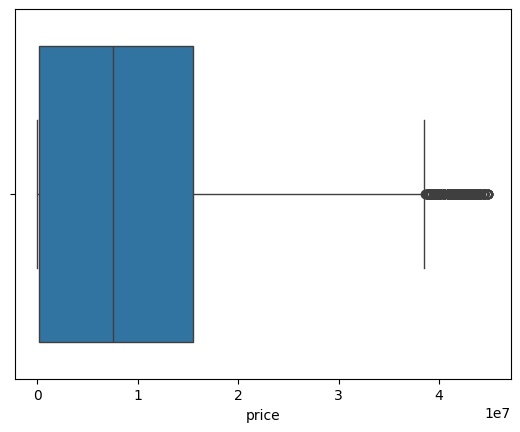


Correlation Matrix:
             price  bedrooms     baths
price     1.000000  0.464393  0.496222
bedrooms  0.464393  1.000000  0.863885
baths     0.496222  0.863885  1.000000

City-wise property price comparison:
city
Faisalabad    7.799314e+06
Islamabad     5.838865e+06
Karachi       9.498481e+06
Lahore        1.678080e+07
Rawalpindi    7.926352e+06
Name: price, dtype: float64

Distribution of properties based on their purpose:
purpose
For Sale    70947
For Rent    28552
Name: count, dtype: int64

Average price of flats: 7453661.030459899
Average size of flats: 5.9746417585715355

Popular locations based on number of listings:
location
DHA Defence               11787
Bahria Town Karachi        6697
Bahria Town Rawalpindi     5257
Bahria Town                4437
Gulistan-e-Jauhar          3532
Gulshan-e-Iqbal Town       3061
E-11                       2060
North Karachi              1878
North Nazimabad            1729
Scheme 33                  1592
Name: count, dtype: int64

Proper

c:\Users\Joyia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data=pd.read_csv("C:/Users/OneDrive/Documents/Python-assign-analysis/Python-data-analysis-assignment/house_prices.csv")

# 1. Data Exploration and Analysis

# Overview
print("Average price of properties in the dataset:", data['price'].mean())

# Distribution of property types
property_type_distribution = data['property_type'].value_counts()
print("Distribution of property types:")
print(property_type_distribution)

# Number of properties listed for sale and cities
properties_by_city = data.groupby('city').size()
print("\nNumber of properties listed for sale, and in which cities:")
print(properties_by_city)

# Location Analysis
location_avg_prices = data.groupby('location')['price'].mean()
print("\nLocations with highest and lowest average property prices:")
print(location_avg_prices.idxmax(), location_avg_prices.max())
print(location_avg_prices.idxmin(), location_avg_prices.min())

# Most popular locations based on number of listings
popular_locations = data['location'].value_counts().head(10)
print("\nMost popular locations based on number of listings:")
print(popular_locations)

# Property Characteristics
print("\nAverage number of bedrooms:", data['bedrooms'].mean())
print("Average number of bathrooms:", data['baths'].mean())

# Price Analysis
sns.boxplot(x='price', data=data)
plt.show()

# Correlation between price, bedrooms, and bathrooms
correlation_matrix = data[['price', 'bedrooms', 'baths']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# City Comparison
city_comparison = data.groupby('city')['price'].mean()
print("\nCity-wise property price comparison:")
print(city_comparison)

# Purpose of Listings
purpose_distribution = data['purpose'].value_counts()
print("\nDistribution of properties based on their purpose:")
print(purpose_distribution)

# Specific Property Types
flats_data = data[data['property_type'] == 'Flat']
print("\nAverage price of flats:", flats_data['price'].mean())
print("Average size of flats:", flats_data['Area_in_Marla'].mean())

# Popular Locations and Property Types
print("\nPopular locations based on number of listings:")
print(popular_locations)
print("\nProperty types prevalent in popular locations:")
for location in popular_locations.index:
    print(location)
    print(data[data['location'] == location]['property_type'].value_counts())

# 2. Hypothesis Testing

# Is the average price of same-size flats in all the cities equal or not?
# Using one-way ANOVA test
anova_result = stats.f_oneway(*(group['price'] for name, group in flats_data.groupby('city')))
print("\nANOVA Result for same-size flats in all cities:")
print("p-value:", anova_result.pvalue)
if anova_result.pvalue < 0.05:
    print("Reject null hypothesis. There is a significant difference in average prices of same-size flats across cities.")
else:
    print("Fail to reject null hypothesis.")

# Is there any association between purpose and property type?
# Using Chi-square test of independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(data['purpose'], data['property_type']))
print("\nChi-square test result for association between purpose and property type:")
print("p-value:", p)
if p < 0.05:
    print("Reject null hypothesis. There is a significant association between purpose and property type.")
else:
    print("Fail to reject null hypothesis.")

# 3. Predictive Modeling

# Feature selection
X = data[['location', 'bedrooms', 'Area_in_Marla']]
y = data['price']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\nLinear Regression Model Performance:")
print("R-squared score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
